In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Melbourne_housing_FULL.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [115]:
df.shape

(34857, 21)

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


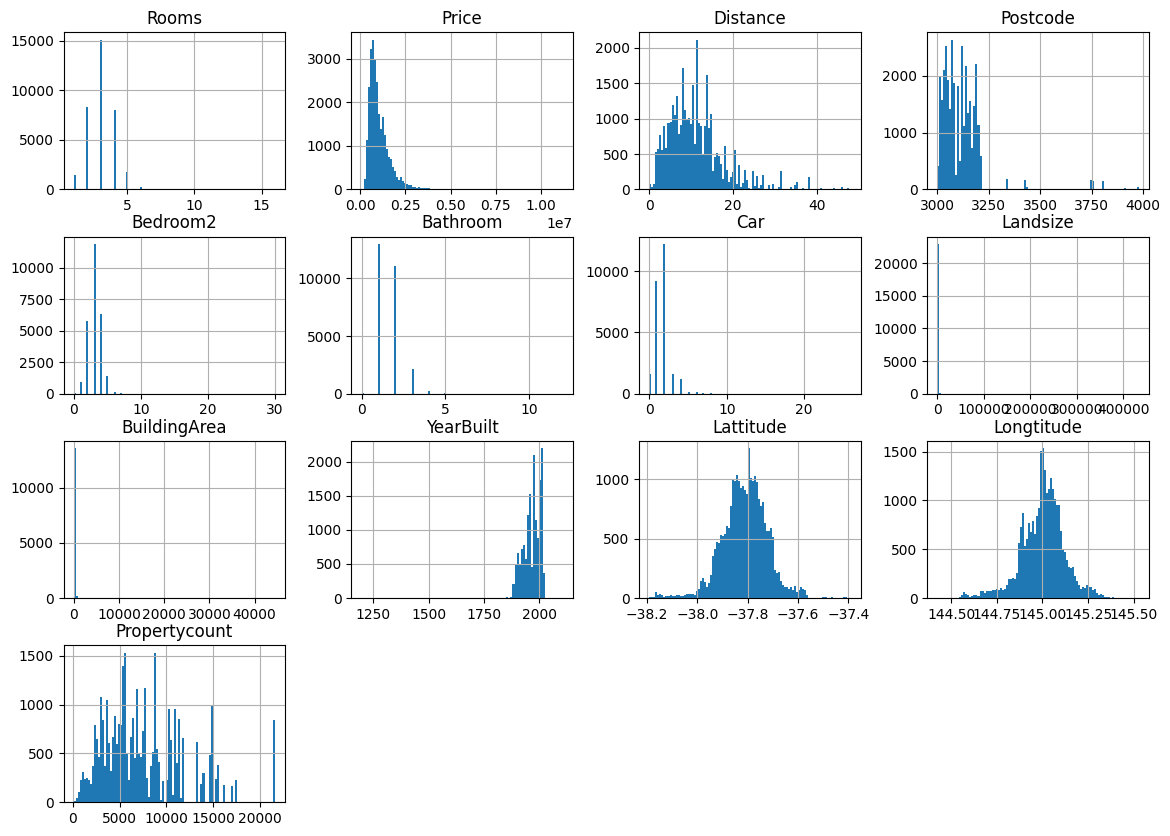

In [118]:
df.hist(bins=100 , figsize=(14,10))
plt.show()

In [123]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [126]:
df.isnull().sum()/df.shape[0]

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionname       0.000086
Propertycount    0.000086
dtype: float64

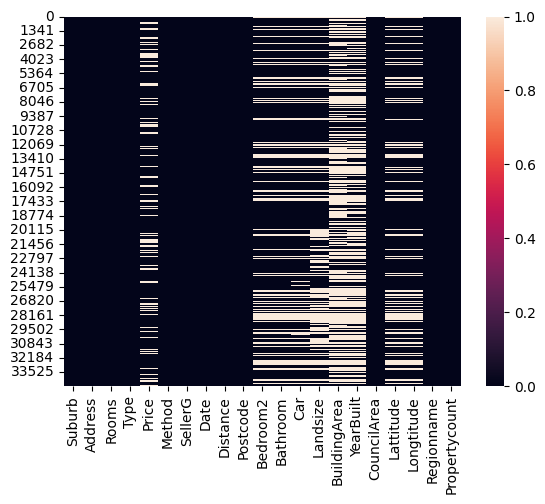

In [127]:
sns.heatmap(df.isnull())
plt.show()

In [128]:
duplicated = df.duplicated()
print(duplicated.sum())

1


In [129]:
df[duplicated]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [130]:
df.drop_duplicates(inplace = True , keep="first") #keep : {'first', 'last', ``False``}, default 'first'
df.duplicated().sum()

0

In [131]:
df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [132]:
df['YearBuilt']

0           NaN
1           NaN
2        1900.0
3           NaN
4        1900.0
          ...  
34852       NaN
34853    2018.0
34854    2000.0
34855       NaN
34856    1930.0
Name: YearBuilt, Length: 34856, dtype: float64

In [133]:
df['Age_built'] = 2023 - df['YearBuilt']

In [134]:
df['Age_built'].value_counts()

Age_built
 53.0     1490
 63.0     1260
 73.0     1089
 43.0      726
 123.0     606
          ... 
 193.0       1
-83.0        1
 126.0       1
 147.0       1
 144.0       1
Name: count, Length: 160, dtype: int64

In [135]:
df.loc[df['Age_built']< 0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age_built
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105.0,...,2.0,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0,-83.0


In [136]:
df.drop(df.loc[df['Age_built']< 0].index, inplace = True)

In [137]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Age_built'],
      dtype='object')

In [138]:
df['Price'].agg(['min' , "max"])

min       85000.0
max    11200000.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Melbourne  Housing Map')

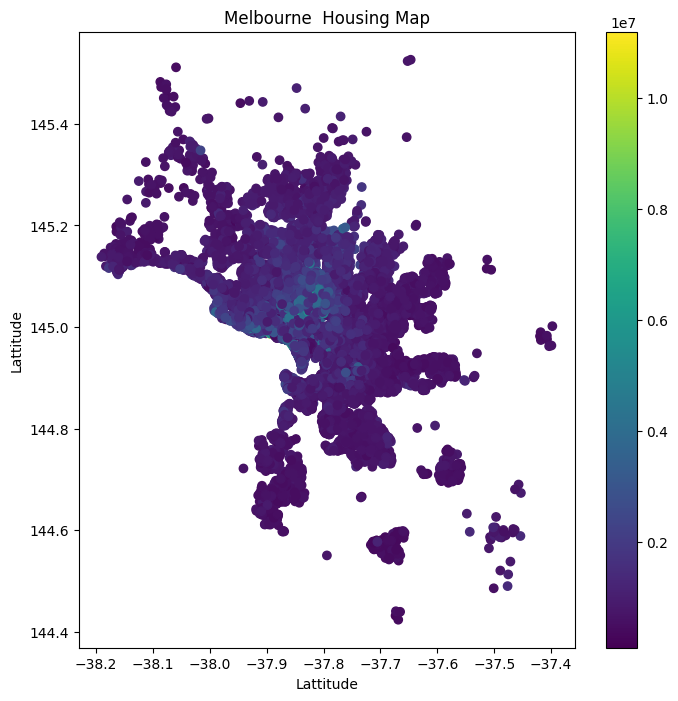

In [139]:
plt.figure(figsize= (8,8))
plt.scatter(df['Lattitude'] , df['Longtitude'] , c=df['Price'] )
plt.colorbar()
plt.xlabel("Lattitude")
plt.ylabel("Lattitude")
plt.title("Melbourne  Housing Map")

In [140]:
df.groupby(["Rooms"])['Price'].count()

Rooms
1      1196
2      6787
3     11957
4      5918
5      1209
6       137
7        20
8        14
9         1
10        5
12        2
16        1
Name: Price, dtype: int64

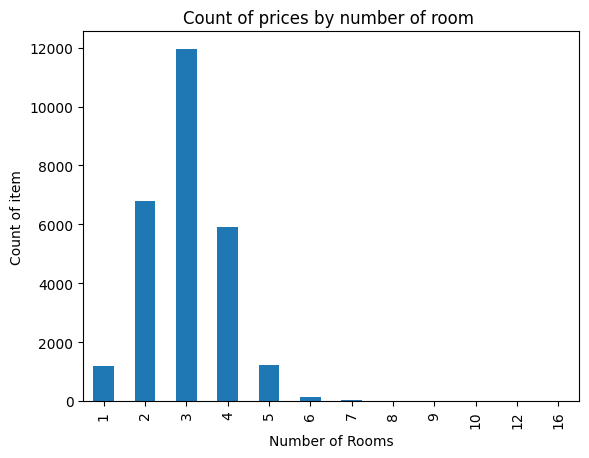

In [147]:
df.groupby(["Rooms"])['Price'].count().plot(kind = "bar")
plt.xlabel("Number of Rooms")
plt.ylabel("Count of item")
plt.title("Count of prices by number of room ")
plt.show()

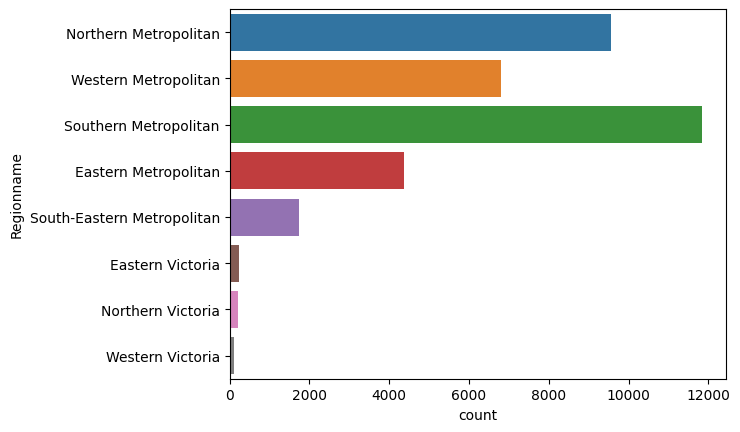

In [149]:
sns.countplot(y= df['Regionname'])
plt.show()

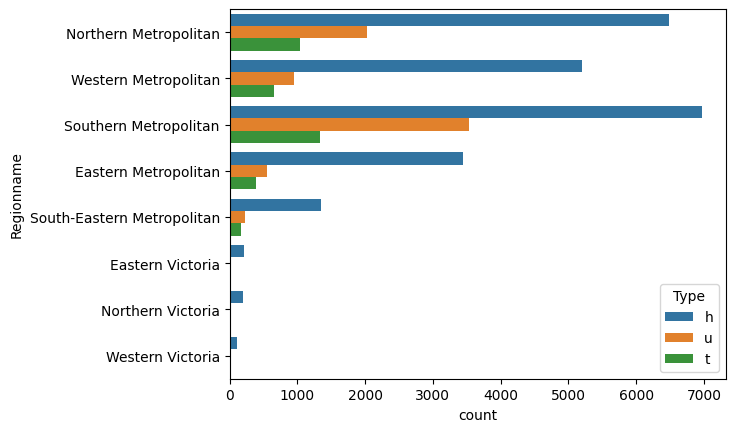

In [151]:
sns.countplot(y='Regionname', hue= 'Type' , data = df)
plt.show()

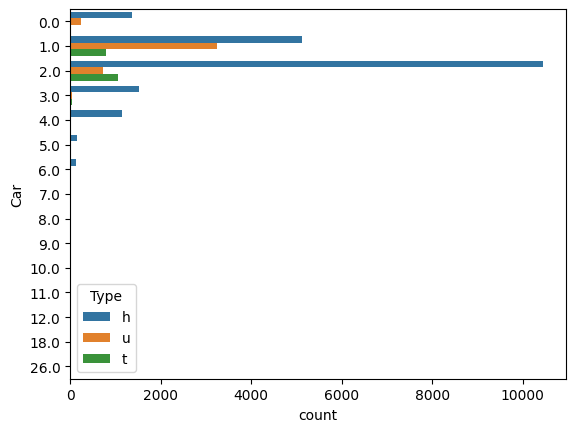

In [153]:
sns.countplot(y='Car', hue= 'Type' , data = df)
plt.show()

In [154]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age_built
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,123.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,NaN
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,5.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,23.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


In [155]:
df['SellerG'].value_counts()

SellerG
Jellis             3358
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: count, Length: 388, dtype: int64

In [157]:
print (df.groupby(["SellerG"])['Price'].sum())


SellerG
@Realty          7920500.0
A                      0.0
AIME              980000.0
ASL              6135500.0
Abercromby's    67367000.0
                   ...    
iOne              620000.0
iProperty         820000.0
iSell           18079000.0
iTRAK           23897700.0
voglwalpole            0.0
Name: Price, Length: 388, dtype: float64


In [158]:
print (df.groupby(["SellerG"])['Price'].mean())

SellerG
@Realty         7.200455e+05
A                        NaN
AIME            9.800000e+05
ASL             1.227100e+06
Abercromby's    2.041424e+06
                    ...     
iOne            6.200000e+05
iProperty       8.200000e+05
iSell           7.231600e+05
iTRAK           7.708935e+05
voglwalpole              NaN
Name: Price, Length: 388, dtype: float64


In [169]:
top_seller = df.groupby(["SellerG"])['Price'].sum()
top_seller = pd.DataFrame(top_seller)
top_seller = top_seller.reset_index()
top_seller.sort_values("Price" , ascending=False)

,SellerG,Price
155,Jellis,3.420200e+09
227,Nelson,2.791256e+09
198,Marshall,2.391432e+09
23,Barry,2.037939e+09
370,hockingstuart,1.972578e+09
...,...,...
121,Gold,0.000000e+00
170,Knight,0.000000e+00
350,Waterfront,0.000000e+00
351,Watermark,0.000000e+00


In [171]:
top_seller['Saller%'] = (top_seller['Price'] / df['Price'].sum())
top_seller

,SellerG,Price,Saller%
0,@Realty,7920500.0,0.000277
1,A,0.0,0.000000
2,AIME,980000.0,0.000034
3,ASL,6135500.0,0.000214
4,Abercromby's,67367000.0,0.002354
...,...,...,...
383,iOne,620000.0,0.000022
384,iProperty,820000.0,0.000029
385,iSell,18079000.0,0.000632
386,iTRAK,23897700.0,0.000835


In [4]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [95]:
df1 = df.drop(columns=['Address','Date','Postcode','YearBuilt','Lattitude','Longtitude'])
df1

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0


In [96]:
# Drop rows with missing values
df1 = df1.dropna()
df1

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,Yarra City Council,Northern Metropolitan,4019.0
11,Abbotsford,3,h,1876000.0,S,Nelson,2.5,4.0,2.0,0.0,245.0,210.0,Yarra City Council,Northern Metropolitan,4019.0
14,Abbotsford,2,h,1636000.0,S,Nelson,2.5,2.0,1.0,2.0,256.0,107.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3,h,500000.0,PI,Ray,25.5,3.0,2.0,2.0,383.0,118.0,Whittlesea City Council,Northern Metropolitan,2940.0
34849,Wollert,3,h,570000.0,SP,RW,25.5,3.0,2.0,2.0,404.0,158.0,Whittlesea City Council,Northern Metropolitan,2940.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,Western Metropolitan,6543.0


In [97]:
# Print number of unique values for each column
print(df1.nunique().to_string())

Suburb            318
Rooms              10
Type                3
Price            1871
Method              5
SellerG           254
Distance          202
Bedroom2           12
Bathroom            9
Car                11
Landsize         1252
BuildingArea      639
CouncilArea        33
Regionname          8
Propertycount     315


In [98]:
# Convert categorical variables into dummy/indicator variables
df1 = pd.get_dummies(df1, dtype=int)

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9244 entries, 2 to 34856
Columns: 630 entries, Rooms to Regionname_Western Victoria
dtypes: float64(8), int32(621), int64(1)
memory usage: 22.6 MB


In [100]:
# Convert categorical variables into dummy/indicator variables
#df2 = pd.get_dummies(df1, dtype=int)

In [101]:
#df2.info()

In [102]:
x=df1.drop(columns="Price")
x

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.5,2.0,1.0,0.0,156.0,79.0,4019.0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,3,2.5,3.0,2.0,0.0,134.0,150.0,4019.0,1,0,...,1,0,0,0,1,0,0,0,0,0
6,4,2.5,3.0,1.0,2.0,120.0,142.0,4019.0,1,0,...,1,0,0,0,1,0,0,0,0,0
11,3,2.5,4.0,2.0,0.0,245.0,210.0,4019.0,1,0,...,1,0,0,0,1,0,0,0,0,0
14,2,2.5,2.0,1.0,2.0,256.0,107.0,4019.0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,25.5,3.0,2.0,2.0,383.0,118.0,2940.0,0,0,...,0,0,0,0,1,0,0,0,0,0
34849,3,25.5,3.0,2.0,2.0,404.0,158.0,2940.0,0,0,...,0,0,0,0,1,0,0,0,0,0
34853,2,6.3,2.0,2.0,1.0,98.0,104.0,6543.0,0,0,...,0,0,0,0,0,0,0,0,1,0
34854,2,6.3,2.0,1.0,2.0,220.0,120.0,6543.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
y=df1["Price"]
y

2        1035000.0
4        1465000.0
6        1600000.0
11       1876000.0
14       1636000.0
           ...    
34847     500000.0
34849     570000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 9244, dtype: float64

In [104]:
type(x)

pandas.core.frame.DataFrame

In [105]:
type(y)

pandas.core.series.Series

In [106]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, train_size=0.7, random_state=45)

In [107]:
pd.concat([xtrain,ytrain],axis=1)

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,...,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Price
2174,3,5.2,3.0,1.0,1.0,229.0,97.0,11918.0,0,0,...,0,0,0,1,0,0,0,0,0,855000.0
25014,4,14.3,4.0,2.0,2.0,786.0,200.0,10999.0,0,0,...,0,1,0,0,0,0,0,0,0,1340000.0
16741,4,4.0,4.0,2.0,2.0,425.0,140.0,5533.0,0,0,...,0,0,0,1,0,0,0,0,0,1210000.0
23997,4,8.4,4.0,2.0,3.0,655.0,175.0,14577.0,0,0,...,0,0,0,1,0,0,0,0,0,1331000.0
15331,3,15.5,3.0,2.0,2.0,809.0,188.0,6202.0,0,0,...,0,1,0,0,0,0,0,0,0,1350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32909,3,18.4,3.0,2.0,2.0,442.0,173.0,5811.0,0,0,...,0,0,0,0,0,0,0,1,0,574000.0
487,2,5.9,2.0,1.0,1.0,0.0,62.0,6567.0,0,0,...,0,0,0,0,0,0,0,1,0,467000.0
18514,1,2.1,1.0,1.0,1.0,0.0,57.0,5825.0,0,0,...,0,0,0,1,0,0,0,0,0,490000.0
20404,3,5.2,3.0,1.0,1.0,275.0,106.0,7082.0,0,0,...,0,0,0,1,0,0,0,0,0,875000.0


In [108]:
pd.concat([xtest, ytest],axis=1)    # Just for displa, how was data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,...,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Price
10762,3,5.1,3.0,2.0,1.0,138.0,147.0,4380.0,0,0,...,0,0,0,0,0,0,1,0,0,1540000.0
17579,3,11.2,3.0,1.0,1.0,626.0,122.0,2606.0,0,0,...,0,0,0,1,0,0,0,0,0,735000.0
1546,2,13.9,2.0,2.0,2.0,0.0,83.0,10969.0,0,0,...,0,0,0,0,0,0,1,0,0,485000.0
7434,3,5.5,2.0,1.0,1.0,348.0,130.0,11364.0,0,0,...,0,0,0,1,0,0,0,0,0,1080000.0
3226,2,3.4,2.0,1.0,0.0,164.0,99.0,2954.0,0,0,...,0,0,0,1,0,0,0,0,0,1290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,3,13.9,3.0,1.0,1.0,294.0,105.0,10969.0,0,0,...,0,0,0,0,0,0,1,0,0,810000.0
15936,4,23.5,4.0,2.0,2.0,502.0,320.0,11667.0,0,0,...,0,0,0,0,0,1,0,0,0,1005800.0
5465,2,9.4,2.0,1.0,1.0,89.0,85.0,2674.0,0,0,...,0,1,0,0,0,0,0,0,0,360000.0
4,3,2.5,3.0,2.0,0.0,134.0,150.0,4019.0,1,0,...,0,0,0,1,0,0,0,0,0,1465000.0


In [109]:
model = LinearRegression()
model

LinearRegression()

In [110]:
model.fit(xtrain,ytrain)

LinearRegression()

In [111]:
predt=model.predict(xtrain)
print(predt)

[1118882.29296875 1351980.9140625  1559809.8203125  ...  503652.1953125
  969164.9609375  2528032.6875    ]


In [112]:
model.score(xtrain,ytrain)

0.7414884227433198

In [113]:
model.score(xtest,ytest)

-561228725817.8192